In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#loading dataset

In [4]:
df=pd.read_csv("/content/archive (4).zip")

In [5]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df.shape

(344, 7)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [8]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [81]:
#descriptive statistics
df.describe()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,0.918605,0.662791,43.921930,17.151170,200.915205,4201.754386,1.514535
std,0.893320,0.726194,5.443643,1.969027,14.020657,799.613058,0.506308
min,0.000000,0.000000,32.100000,13.100000,172.000000,2700.000000,0.000000
25%,0.000000,0.000000,39.275000,15.600000,190.000000,3550.000000,1.000000
50%,1.000000,1.000000,44.250000,17.300000,197.000000,4050.000000,2.000000
75%,2.000000,1.000000,48.500000,18.700000,213.000000,4750.000000,2.000000
max,2.000000,2.000000,59.600000,21.500000,231.000000,6300.000000,2.000000


#visualization

<Axes: >

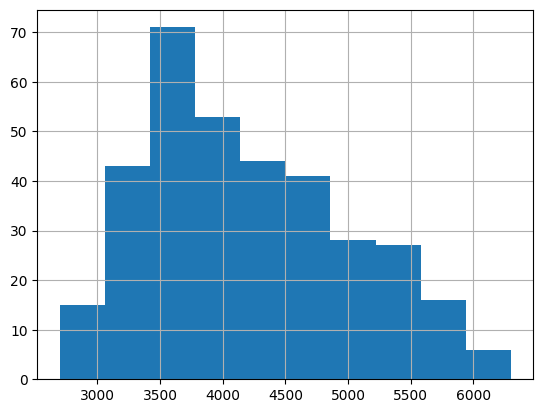

In [67]:
#univariate analysis

df.body_mass_g.hist()

<Axes: xlabel='body_mass_g', ylabel='Count'>

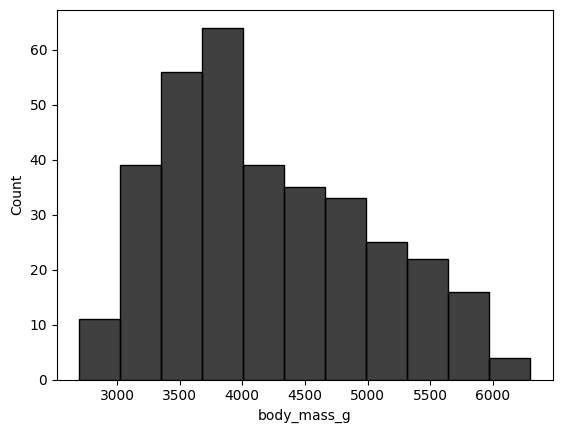

In [69]:
sns.histplot(data=df,x="body_mass_g",color="black")

In [70]:
df.body_mass_g.skew()

0.47169044722118986

<Axes: xlabel='body_mass_g'>

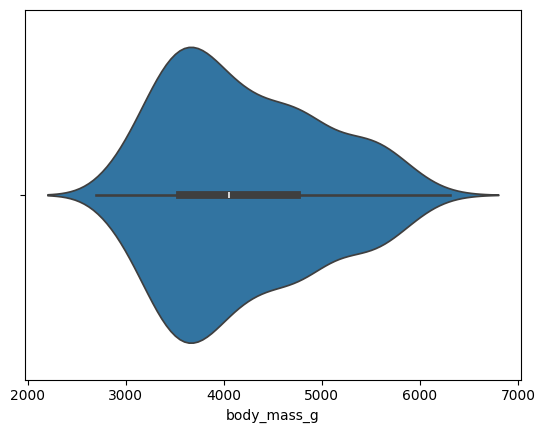

In [74]:
sns.violinplot(data=df,x="body_mass_g")

Text(0, 0.5, 'depth')

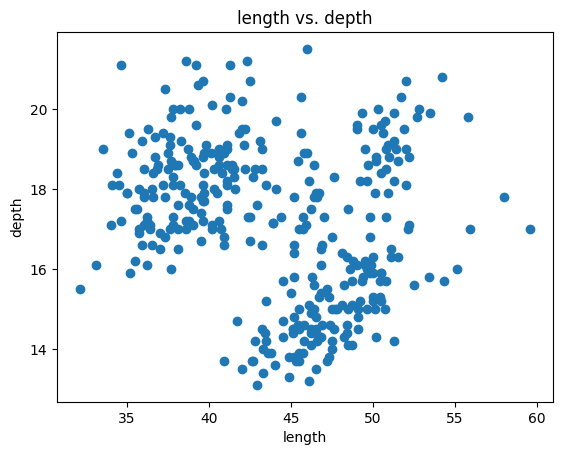

In [75]:
#bi variate analysis
import matplotlib.pyplot as plt
plt.scatter(df.culmen_length_mm, df.culmen_depth_mm)
plt.title('length vs. depth')
plt.xlabel('length')
plt.ylabel('depth')

<Axes: xlabel='body_mass_g', ylabel='Density'>

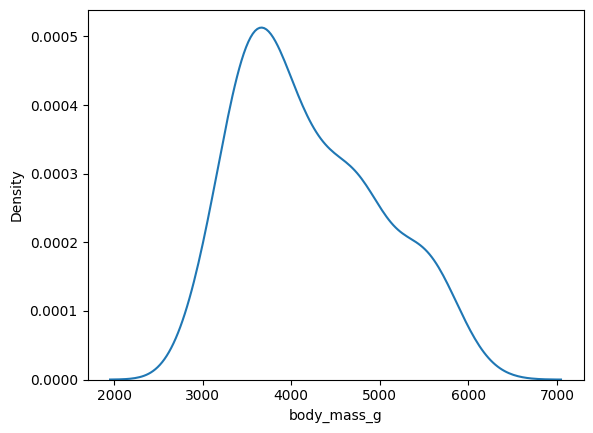

In [77]:
sns.kdeplot(data=df,x="body_mass_g")

<ipython-input-78-194c48723823>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df,x="body_mass_g",shade=True,color="green")


<Axes: xlabel='body_mass_g', ylabel='Density'>

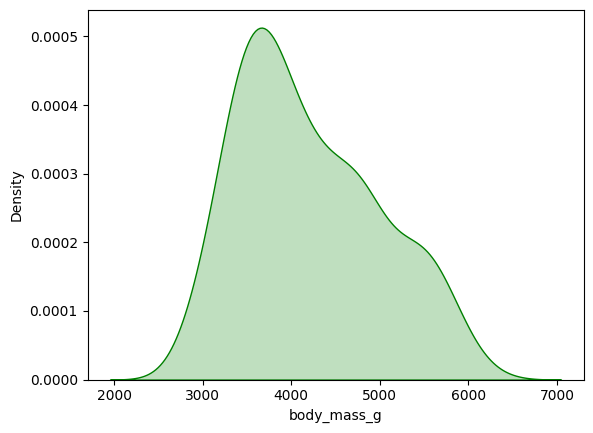

In [78]:
sns.kdeplot(data=df,x="body_mass_g",shade=True,color="green")

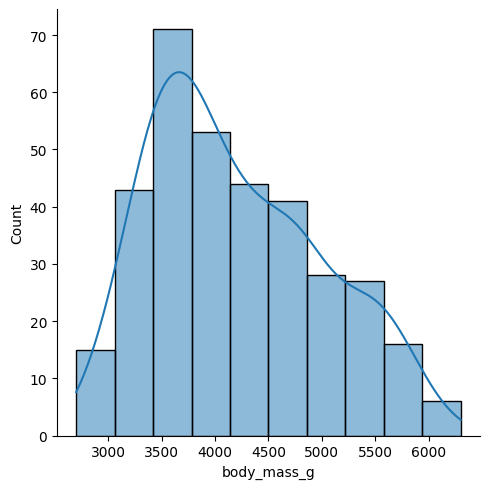

In [80]:
sns.displot(data=df,x="body_mass_g",bins=10,kde=True)

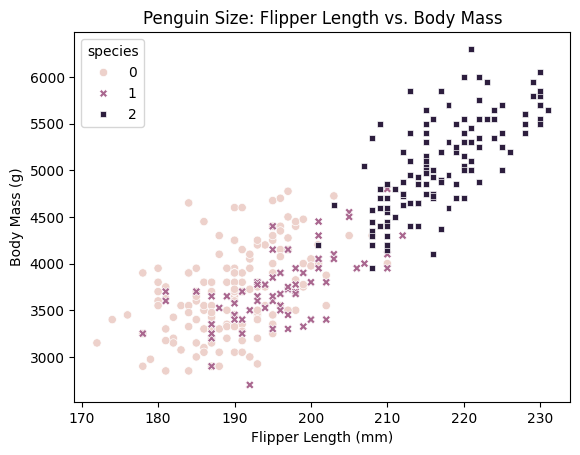

In [87]:
sns.scatterplot(data=df, x='flipper_length_mm', y='body_mass_g', hue='species', style='species')
plt.title('Penguin Size: Flipper Length vs. Body Mass')
plt.xlabel('Flipper Length (mm)')
plt.ylabel('Body Mass (g)')
plt.show()

#correlation

<Axes: >

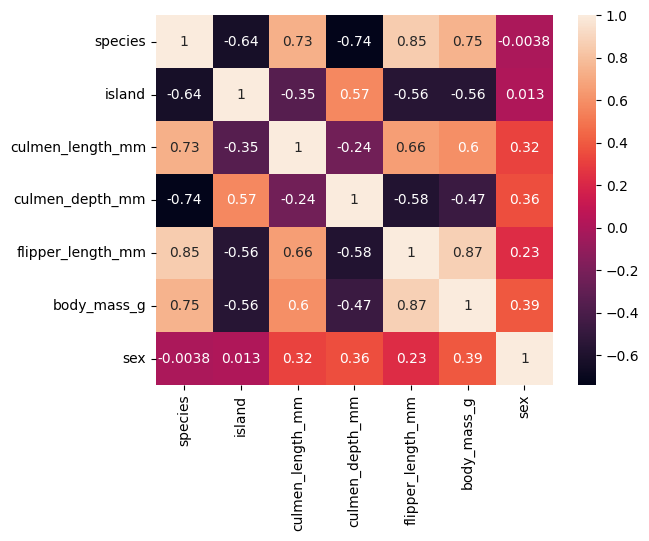

In [88]:
sns.heatmap(df.corr(),annot = True)


#handling null values

In [15]:
# Replace null values with the mean for numeric columns
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'body_mass_g', 'flipper_length_mm']
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

In [16]:
# Replace null values in 'sex' column with the mode
df['sex'] = df['sex'].fillna(df['sex'].mode().iloc[0])

#finding outliers

<Axes: ylabel='culmen_length_mm'>

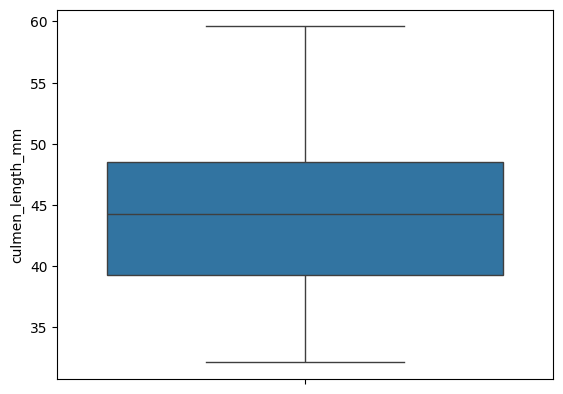

In [19]:
sns.boxplot(df.culmen_length_mm)

<Axes: ylabel='culmen_depth_mm'>

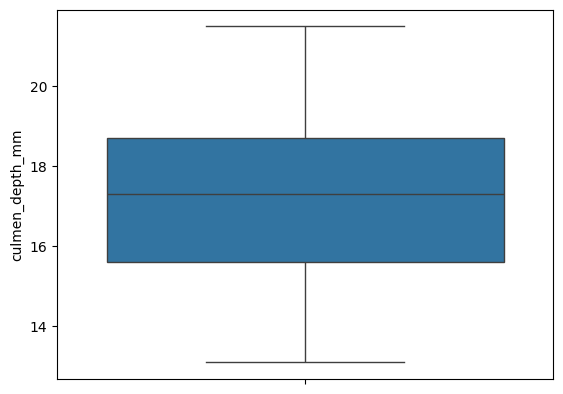

In [20]:
sns.boxplot(df.culmen_depth_mm)

<Axes: ylabel='flipper_length_mm'>

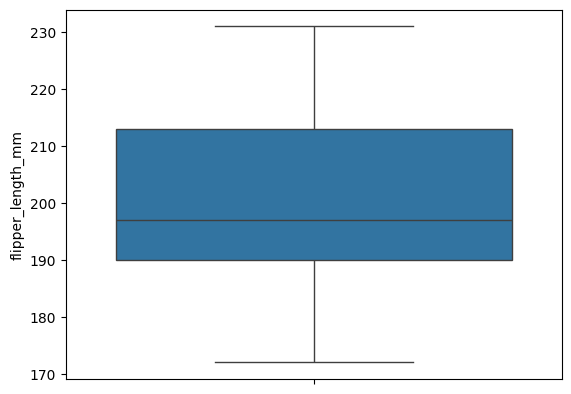

In [22]:
sns.boxplot(df.flipper_length_mm)

<Axes: ylabel='body_mass_g'>

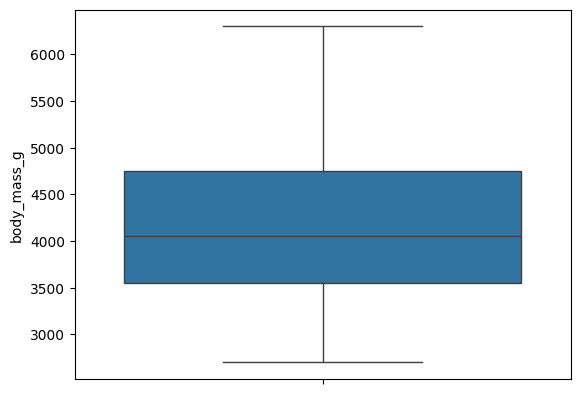

In [23]:
sns.boxplot(df.body_mass_g)

In [27]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE


#encoding categorical columns

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
le=LabelEncoder()

In [30]:
df.species=le.fit_transform(df.species)

In [31]:
df.island=le.fit_transform(df.island)

In [32]:
df.sex=le.fit_transform(df.sex)

In [33]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,2
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,2
4,0,2,36.70000,19.30000,193.000000,3450.000000,1


#splitting independant and dependant

In [85]:
x=df.drop(['species'],axis=1)

In [36]:
y=df.species

#scaling

In [37]:
from sklearn.preprocessing import MinMaxScaler

In [38]:
scale=MinMaxScaler()

In [39]:
x_scaled=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

In [40]:
x_scaled.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,1.0
1,1.0,0.269091,0.511905,0.237288,0.305556,0.5
2,1.0,0.298182,0.583333,0.389831,0.152778,0.5
3,1.0,0.429888,0.482282,0.490088,0.417154,1.0
4,1.0,0.167273,0.738095,0.355932,0.208333,0.5


In [41]:
df.shape

(344, 7)

#train test split

In [42]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=42)

In [45]:
x_train.shape

(240, 6)

In [46]:
x_test.shape

(104, 6)

#training the model

In [47]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [48]:
model.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_pred=model.predict(x_test)

In [50]:
y_pred

array([1, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 1, 0, 1, 1, 2, 1, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 2, 0, 1, 1, 0, 0,
       2, 0, 1, 2, 2, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2])

In [51]:
y_pred1=model.predict(x_train)
y_pred1

array([0, 2, 2, 1, 2, 0, 2, 0, 0, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0,
       2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 2,
       2, 0, 2, 2, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 2, 0, 2, 2, 0, 0, 2, 0,
       0, 2, 0, 1, 1, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2,
       0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 2, 0, 2, 1, 2, 0,
       2, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 0, 1, 1, 2, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 2, 0,
       0, 2, 1, 2, 0, 2, 2, 2, 0, 0, 0, 1, 2, 1, 1, 0, 0, 2, 2, 0, 2, 1,
       2, 1, 2, 2, 2, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 2, 0])

In [52]:
y_test

194    1
157    1
225    2
208    1
318    2
      ..
79     0
108    0
18     0
116    0
266    2
Name: species, Length: 104, dtype: int64

In [53]:
comparison=pd.DataFrame({'Actual Value':y_test,'predicted_value':y_pred})

In [54]:
comparison.tail(15)

,Actual Value,predicted_value
145,0,0
209,1,1
254,2,2
287,2,2
139,0,0
272,2,2
179,1,1
143,0,0
19,0,0
256,2,2


#testing with random value

In [55]:
# testing with a random value
model.predict([[1.0,0.298182,0.666667,0.490088,0.208333,0.5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

#evaluation

In [65]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve

In [57]:
## Accuracy Score
# Testing Accuracy
accuracy_score(y_test,y_pred)

0.9903846153846154

In [58]:
# Training Accuracy
accuracy_score(y_train,y_pred1)

0.9833333333333333

In [59]:
confusion_matrix(y_test,y_pred)


array([[50,  0,  0],
       [ 1, 19,  0],
       [ 0,  0, 34]])

In [60]:
pd.crosstab(y_test,y_pred)


col_0,0,1,2
species,,,
0,50,0,0
1,1,19,0
2,0,0,34


In [61]:
# Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        50
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00        34

    accuracy                           0.99       104
   macro avg       0.99      0.98      0.99       104
weighted avg       0.99      0.99      0.99       104



In [63]:
# ROC -AUC Score
probability = model.predict_proba(x_test)[:,1]
probability

array([0.73827033, 0.51773122, 0.04751261, 0.53492368, 0.10401402,
       0.03917159, 0.06115694, 0.06225502, 0.16257178, 0.04016592,
       0.05003798, 0.13547696, 0.08206868, 0.09548068, 0.08097267,
       0.10787017, 0.09524914, 0.02426079, 0.03775927, 0.2321794 ,
       0.13191909, 0.05159423, 0.03898824, 0.17697235, 0.67115767,
       0.59322142, 0.14502087, 0.85740372, 0.09154825, 0.548758  ,
       0.10816478, 0.24227417, 0.80858346, 0.1678383 , 0.07384436,
       0.08649181, 0.02556685, 0.56559504, 0.10299064, 0.69450501,
       0.06968859, 0.07035279, 0.02945821, 0.09735525, 0.31975634,
       0.10773147, 0.04694086, 0.119551  , 0.12795438, 0.55473075,
       0.04932622, 0.0193965 , 0.01862659, 0.1149135 , 0.128932  ,
       0.80464226, 0.07584025, 0.57267061, 0.70035191, 0.04627606,
       0.70375794, 0.1475563 , 0.04055991, 0.08010543, 0.07859412,
       0.29576843, 0.42976325, 0.28325612, 0.19942634, 0.0621372 ,
       0.04096311, 0.09043064, 0.23547095, 0.01817808, 0.05411